In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2026-01-30 01:53:30--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [   <=>              ]  22.62M  54.1MB/s    in 0.4s    

2026-01-30 01:53:31 (54.1 MB/s) - ‘online+retail.zip’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [ ]:
df1=pd.read_excel("Online Retail.xlsx",dtype={'InvoiceNo': "string", "StockCode": "string", "Description":"string"})
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), string(3)
memory usage: 33.1+ MB


In [ ]:
df1["Country"] = df1["Country"].astype('string')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


### DATA CLEANING: HANDLING MISSING VALUES

In [ ]:
df1.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df1[df1["Description"].isna()].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [ ]:
df1[df1["StockCode"]=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
df1[df1["StockCode"]=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


#### count frequency of description for each stock and appears most count first

In [ ]:
most_freq=df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [ ]:
df1[df1["StockCode"]=="85123A"].Description.unique()

<StringArray>
['WHITE HANGING HEART T-LIGHT HOLDER',                                  '?',
        'wrongly marked carton 22804', 'CREAM HANGING HEART T-LIGHT HOLDER']
Length: 4, dtype: string

In [ ]:
most_freq.Description

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,REGENCY CAKESTAND 3 TIER
2,JUMBO BAG RED RETROSPOT
3,PARTY BUNTING
4,LUNCH BAG RED RETROSPOT
...,...
4787,SET OF THREE VINTAGE GIFT WRAPS
4788,damaged
4789,damages
4790,check


In [ ]:
most_freq[most_freq["StockCode"]=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
most_freq=most_freq.groupby("StockCode").head(1)
most_freq # here groupby is used to group the stockcode for most occuring description

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


In [ ]:
most_freq[most_freq["StockCode"]=="85123A"]

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


#### merge two dataframes based on the stackcode

In [ ]:
most_freq.columns=["StockCode","freq_Description","count"]
df2=df1.merge(most_freq,on="StockCode",how="left")
df2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df2['Description']=df2['freq_Description']
df2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


#### the description null values are does not have description in any stockcode

In [ ]:
df2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
count,112


In [ ]:
df2.dropna(subset=["Description"],inplace=True)
df2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
count,0


#### drop the freq_description and the count they are not used in the analsysis part they are not usefull

In [ ]:
df2.drop(["freq_Description","count"],axis=1,inplace=True)
df2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541797 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541797 non-null  string        
 1   StockCode    541797 non-null  string        
 2   Description  541797 non-null  string        
 3   Quantity     541797 non-null  int64         
 4   InvoiceDate  541797 non-null  datetime64[ns]
 5   UnitPrice    541797 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541797 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 37.2 MB


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [ ]:
df2[df2['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df3=df2[(df2["UnitPrice"]>0) & (df2["Quantity"]>0)]

In [ ]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [ ]:
df3[df3["Quantity"]==df3["Quantity"].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


#### quantile method is used to identify the outliers

In [ ]:
df3['Quantity'].quantile(0.9999) # 99% records are equal to the quantity or below than 100

np.float64(1439.8763999990188)

the records seems normal after considering the quantity >1500 and take it for analysis

In [ ]:
df3[df3["Quantity"]>1500].head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom


FEATURE ENGINEERING: CREATE NEW COLUMNS


In [ ]:
df4=df3.copy()
df4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df4["Totalprice"]=df4['Quantity']*df4['UnitPrice']

In [ ]:
df4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df4["Month"]=df4.InvoiceDate.dt.month
df4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [ ]:
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,Month
252180,559068,22088,PAPER BUNTING COLOURED LACE,1,2011-07-06 10:41:00,2.95,17841.0,United Kingdom,2.95,7
345408,567165,23148,MINIATURE ANTIQUE ROSE HOOK IVORY,1,2011-09-18 11:58:00,0.83,17841.0,United Kingdom,0.83,9
456775,575712,23294,SET OF 6 SNACK LOAF BAKING CASES,8,2011-11-10 17:46:00,0.83,13606.0,United Kingdom,6.64,11
107058,545408,23194,GYMKHANA TREASURE BOOK BOX,8,2011-03-02 12:10:00,2.25,15067.0,United Kingdom,18.00,3
257505,559535,22355,CHARLOTTE BAG SUKI DESIGN,4,2011-07-10 12:16:00,0.85,17841.0,United Kingdom,3.40,7


**VISUALIZATION AND EDA**

####PLOT MONTHLY SALES



In [ ]:
import seaborn as sns

In [ ]:
monthly_sales=df4.groupby("Month")["Totalprice"].sum()
monthly_sales

,Totalprice
Month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


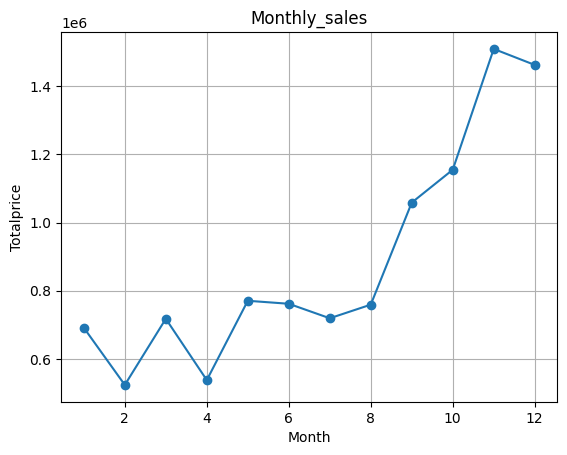

In [ ]:
monthly_sales.plot(kind="line",title="Monthly_sales",marker="o")
plt.xlabel("Month")
plt.ylabel("Totalprice")
plt.grid()
plt.show()

##### clearly see that sales is increasing in August(8) and the peak sales in november(11) and it could be due to feetival season and the retail wants to complete its inventory management

In [ ]:
country_sales = df4.groupby("Country")["Totalprice"].sum().nlargest(5)
country_sales

,Totalprice
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


##### nlargest used for efficiency you can use sort_values() for similar results

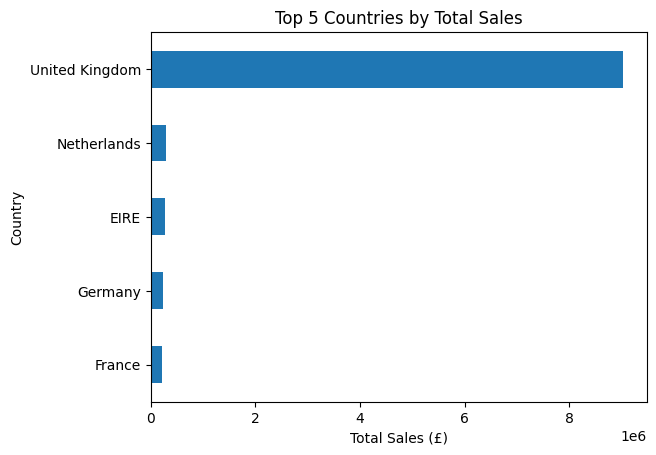

In [ ]:
country_sales.plot(kind="barh", title="Top 5 Countries by Total Sales")
plt.xlabel("Total Sales (£)")
plt.ylabel("Country")
plt.gca().invert_yaxis() # Invert y-axis to have the highest value at the top
plt.show()

In [ ]:
country_wise_sales=df4.groupby("Country")["Totalprice"].sum()
country_perc_distribution=country_wise_sales/country_wise_sales.sum()*100
country_sales_perc=country_perc_distribution.nlargest(5)


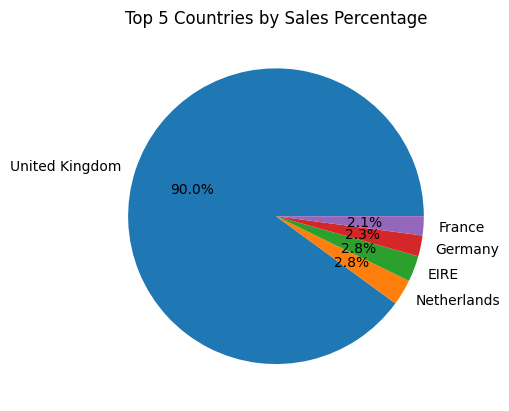

In [ ]:
country_sales_perc.plot(kind="pie",title="Top 5 Countries by Sales Percentage",autopct="%1.1f%%")
plt.ylabel("")
plt.show()


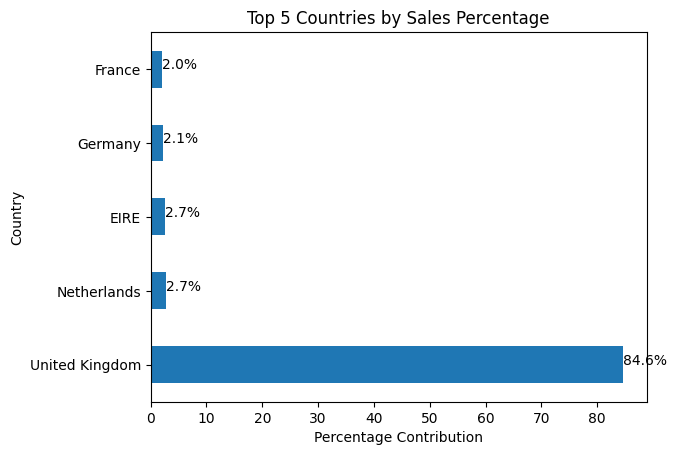

In [ ]:
ax = country_sales_perc.plot(kind="barh", title="Top 5 Countries by Sales Percentage")
plt.xlabel("Percentage Contribution")
plt.ylabel("Country")
for index, value in enumerate(country_sales_perc):
    ax.text(value, index, f'{value:.1f}%')
plt.show()

#### sales are totally depends on United Kingdom (84.6%) the reailer has to give some special offers and dsicounts to keep their customers otherwise if market collapse the comapny has to face huge loss

In [ ]:
product_wise_sales=df4.groupby("StockCode")["Totalprice"].sum().nlargest(5)
product_wise_sales

,Totalprice
StockCode,
DOT,206248.77
22423,174484.74
23843,168469.60
85123A,104518.80
47566,99504.33


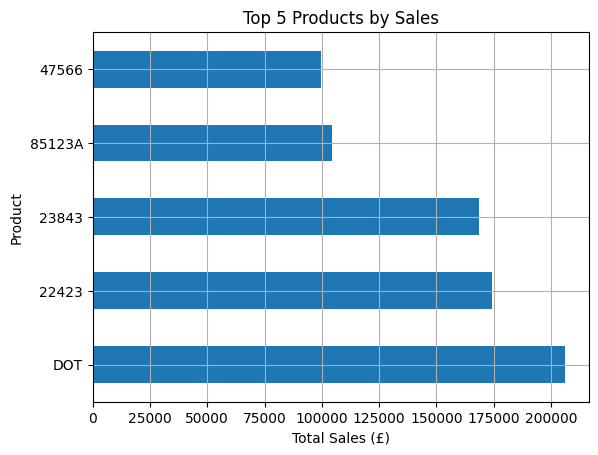

In [ ]:
product_wise_sales.plot(kind="barh",title="Top 5 Products by Sales")
plt.xlabel("Total Sales (£)")
plt.ylabel("Product")
plt.grid()
plt.show()

In [ ]:
for stockcode in product_wise_sales.index:
  description=df4[df4["StockCode"]==stockcode]["Description"].iloc[0]
  print(f"{stockcode}======> {description}")

DOT======> DOTCOM POSTAGE
22423======> REGENCY CAKESTAND 3 TIER
23843======> PAPER CRAFT , LITTLE BIRDIE
85123A======> WHITE HANGING HEART T-LIGHT HOLDER
47566======> PARTY BUNTING


In [ ]:
prodcut_sales=df4.groupby("StockCode")["Totalprice"].sum()
prodcut_sales

,Totalprice
StockCode,
10002,759.89
10080,119.09
10120,40.53
10123C,3.25
10124A,6.72
...,...
gift_0001_20,167.05
gift_0001_30,175.53
gift_0001_40,100.70


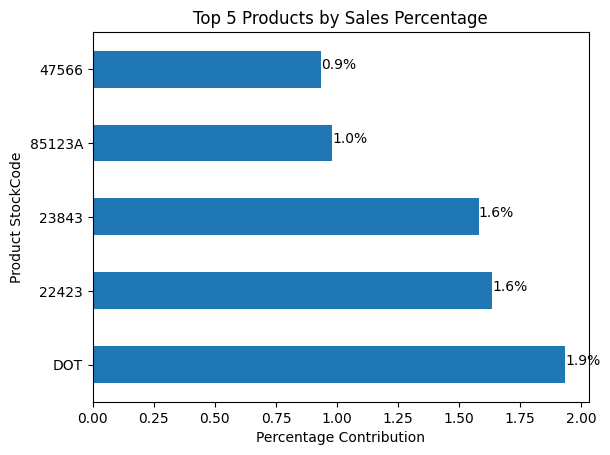

In [ ]:
product_sales_perc = (prodcut_sales/prodcut_sales.sum()) * 100
product_sales_perc = product_sales_perc.nlargest(5)
ax = product_sales_perc.plot(kind="barh", title="Top 5 Products by Sales Percentage")
plt.xlabel("Percentage Contribution")
plt.ylabel("Product StockCode")
for index, value in enumerate(product_sales_perc):
    ax.text(value, index, f'{value:.1f}%')
plt.show()

RFM Analysis(Recency,frequency,monetory(sum))

In [ ]:
df4["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,Month
215435,555719,22331,WOODLAND PARTY BAG + STICKER SET,8,2011-06-06 15:31:00,1.65,12609.0,Germany,13.20,6
338998,566577,22457,NATURAL SLATE HEART CHALKBOARD,1,2011-09-13 13:29:00,5.79,NaN,United Kingdom,5.79,9
420560,572897,22077,6 RIBBONS RUSTIC CHARM,1,2011-10-26 14:42:00,4.13,NaN,United Kingdom,4.13,10
10549,537237,22569,FELTCRAFT CUSHION BUTTERFLY,1,2010-12-06 09:58:00,7.62,NaN,United Kingdom,7.62,12
409402,572058,23546,WRAP PAISLEY PARK,25,2011-10-20 12:43:00,0.42,18252.0,United Kingdom,10.50,10


In [ ]:
df4.InvoiceDate.dt.year.unique()

array([2010, 2011], dtype=int32)

In [ ]:
cur_date=df4.InvoiceDate.max() + pd.Timedelta(days=1)
cur_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm=df4.groupby("CustomerID").agg({
    "InvoiceDate":lambda x:(cur_date-x.max()).days,
    "InvoiceNo":"count",
    "Totalprice":"sum"
})
rfm.columns=["Recency","frequency","monietory"]
rfm.head(5)

,Recency,frequency,monietory
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
rfm["R_segment"] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])
rfm["F_segment"] = pd.qcut(rfm['frequency'], q=4, labels=[1, 2, 3, 4])
rfm["M_segment"] = pd.qcut(rfm['monietory'], q=4, labels=[1, 2, 3, 4])
rfm['rfm_score'] = rfm[['R_segment', 'F_segment', 'M_segment']].sum(axis=1)
rfm

,Recency,frequency,monietory,R_segment,F_segment,M_segment,rfm_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


###**CUSTOMER CHURN ANALYSIS**

In [ ]:
churn_threshold=90
customer_churn=rfm[rfm['Recency']>churn_threshold].Recency
customer_churn.head(5)

,Recency
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


In [ ]:
len(customer_churn)

1449

In [ ]:
customers_last_purchase=rfm.Recency
customers_last_purchase.head(5)

,Recency
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


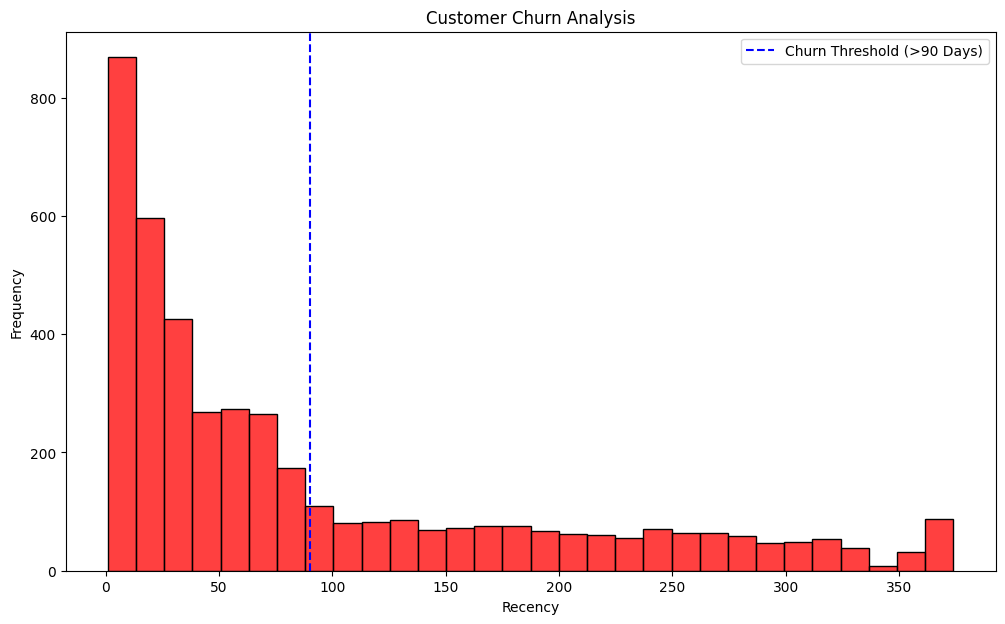

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(customers_last_purchase,bins=30,color="red")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("Customer Churn Analysis")
plt.axvline(churn_threshold, color='blue', linestyle='--', label='Churn Threshold (>90 Days)')
plt.legend()
plt.show()